---
# Feature Engineering
---
In this notebook, ...


## Results

---

### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder


### Read data file

In [2]:
churn_df = pd.read_excel('../data/churn_cleaned.xlsx')
churn_df

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Value,Churn Reason
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1,Competitors
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1,Moved
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,1,Moved
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,1,Moved
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,1,Competitors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,34.341737,-116.539416,Female,No,No,No,72,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,0,Not applicable
7039,Adelanto,92301,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,0,Not applicable
7040,Amboy,92304,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,0,Not applicable
7041,Angelus Oaks,92305,34.167800,-116.864330,Female,No,Yes,Yes,11,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,0,Not applicable


### List of columns to work with

In [3]:
col2discard = ['City', 'Zip Code', 'Latitude', 'Longitude', 'Gender',
               'Phone Service', 'Multiple Lines',
               'Streaming TV', 'Streaming Movies', 'Churn Reason']

col2keep = ['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 
            'Internet Service', 
            'Online Security', 'Online Backup', 'Device Protection',
            'Tech Support', 'Contract', 'Paperless Billing', 'Payment Method',
            'Monthly Charges', 'Churn Value']


col2encode = ['Senior Citizen', 'Partner', 'Dependents', 
              'Internet Service', 
              'Online Security', 'Online Backup', 'Device Protection',
              'Tech Support', 'Contract', 'Paperless Billing', 'Payment Method']

### Removing unecessary columns

I will be removing the availability_date column, since I don't believe that this can affect the price.

In [4]:
churn_df = churn_df.drop(columns = col2discard)

churn_df.head(5)

,Senior Citizen,Partner,Dependents,Tenure Months,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Value
0,No,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,1
1,No,No,Yes,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1
2,No,No,Yes,8,Fiber optic,No,No,Yes,No,Month-to-month,Yes,Electronic check,99.65,1
3,No,Yes,Yes,28,Fiber optic,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,1
4,No,No,Yes,49,Fiber optic,No,Yes,Yes,No,Month-to-month,Yes,Bank transfer (automatic),103.70,1


### Encoding nominal categorical columns

---
As we have seen previously in the Data_Analysis.ipynb, there are eleven category columns.
  * Senior Citizen
  * Partner
  * Dependents
  * Internet Service
  * Online Security
  * Online Backup
  * Device Protection
  * Tech Support
  * Contract
  * Paperless Billing
  * Payment Method


In [5]:
# Create instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False) 

# Encode the categorical columns
encoded_cols = encoder.fit_transform(churn_df[col2encode])

# Put the encoded column into a dataframe
tmp_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(col2encode))

# Removing categorical columns
churn_df = churn_df.drop(columns=col2encode)

# Join encoded dataframe to the rent_df dataframe
churn_df = churn_df.join(tmp_df)

churn_df.head(5)

,Tenure Months,Monthly Charges,Churn Value,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,Online Security_Yes,...,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,70.70,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,8,99.65,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,28,104.80,1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,49,103.70,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Investigating the correlation

---
**Low correlation (red & green)**

**High correlation (blue & purple)**

**Medium correlation (blue & purple)**


#### Conclusion :

- 
-
- 




In [6]:
# Compute correlation
corr = churn_df.select_dtypes(include=[float, int, bool]).corr()

In [7]:
pd.DataFrame(corr['Churn Value']).sort_values(by='Churn Value', ascending=False)

,Churn Value
Churn Value,1.000000
Internet Service_Fiber optic,0.308020
Payment Method_Electronic check,0.301919
Monthly Charges,0.193356
Paperless Billing_Yes,0.191825
Senior Citizen_Yes,0.150889
Device Protection_Yes,-0.066160
Online Backup_Yes,-0.082255
Payment Method_Mailed check,-0.091683
Payment Method_Credit card (automatic),-0.134302


In [8]:
pd.DataFrame(abs(corr['Churn Value'])).sort_values(by='Churn Value', ascending=False).index


Index(['Churn Value', 'Tenure Months', 'Internet Service_Fiber optic',
       'Contract_Two year', 'Payment Method_Electronic check',
       'Dependents_Yes', 'Device Protection_No internet service',
       'Tech Support_No internet service', 'Internet Service_No',
       'Online Security_No internet service',
       'Online Backup_No internet service', 'Monthly Charges',
       'Paperless Billing_Yes', 'Contract_One year', 'Online Security_Yes',
       'Tech Support_Yes', 'Senior Citizen_Yes', 'Partner_Yes',
       'Payment Method_Credit card (automatic)', 'Payment Method_Mailed check',
       'Online Backup_Yes', 'Device Protection_Yes'],
      dtype='object')

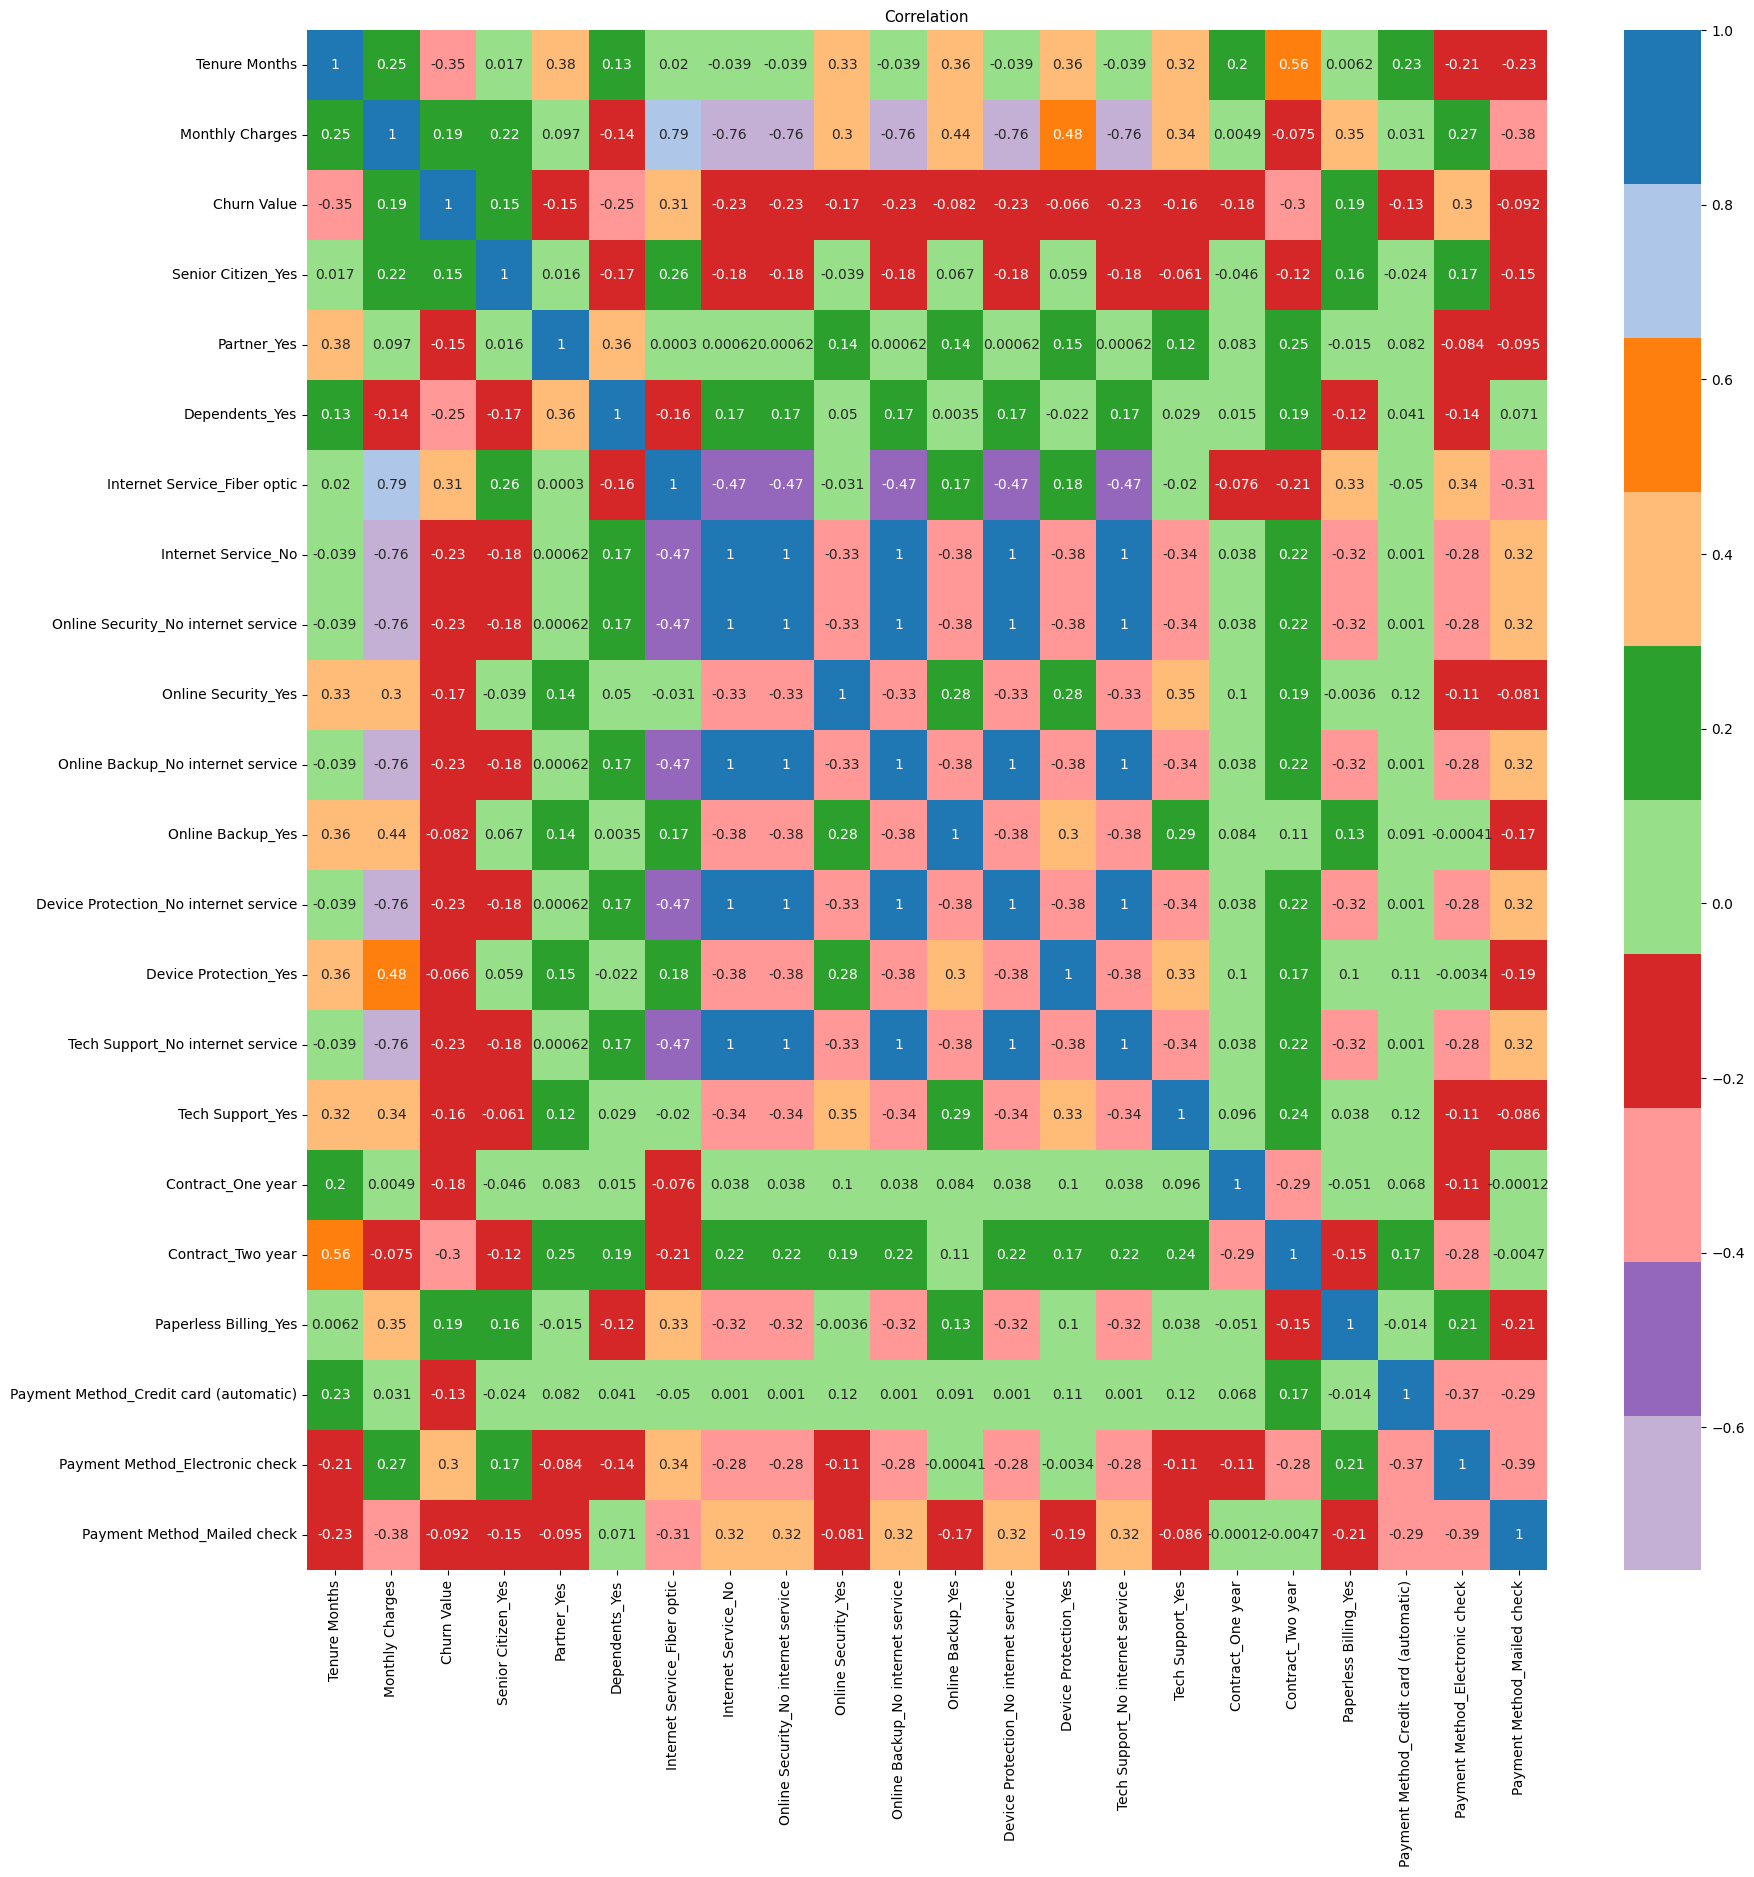

In [10]:
# Heatmap

# Create the figure and adjust its size
plt.figure(figsize = (20, 20))

# I want to use a discrete color palette
# to identify easily values close to 1 and 0
palette = sns.color_palette("tab20",10)
palette.reverse()

# Create the box plot
ax = sns.heatmap(data=corr, annot=True, cmap=palette) 

# Set the title
ax.set_title('Correlation', fontsize = 11)

# Saving the plot t be able to zoom in
plt.savefig('../graph/Correlation_heatmap.png')

# Show plot
plt.show()

### Save the Engineered Features dataset

In [ ]:
rent_df.to_excel(f'../data/churn_cleaned_featEng.csv', index=False)